# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Medicalpremium_new.csv")

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Smoker,Drinking
0,45,0,0,0,0,155,57,0,0,0,28000.0,1,0
1,60,1,0,0,0,180,73,0,0,0,34800.0,0,1
2,36,1,1,0,0,158,59,0,0,1,30912.0,1,1
3,52,1,1,0,1,183,93,0,0,2,28000.0,0,0
4,38,0,0,0,1,166,88,0,0,1,27600.0,0,1


In [4]:
df.dtypes

Age                          int64
Diabetes                     int64
BloodPressureProblems        int64
AnyTransplants               int64
AnyChronicDiseases           int64
Height                       int64
Weight                       int64
KnownAllergies               int64
HistoryOfCancerInFamily      int64
NumberOfMajorSurgeries       int64
PremiumPrice               float64
Smoker                       int64
Drinking                     int64
dtype: object

In [5]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Smoker,Drinking
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,27075.837728,0.274848,0.383367
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,7553.790668,0.446664,0.486453
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,23000.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,27600.000000,0.000000,0.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,31360.000000,1.000000,1.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,51072.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
Smoker                     0
Drinking                   0
dtype: int64

No missing values

# EDA

<AxesSubplot:>

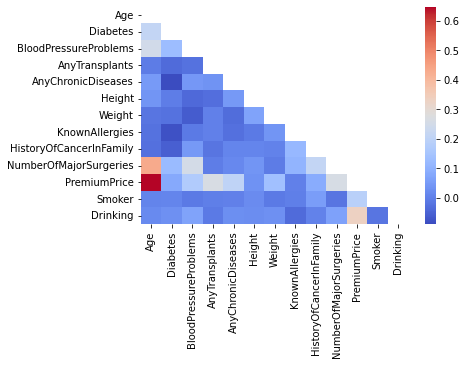

In [7]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, cmap="coolwarm")

In [8]:
df.corr()["PremiumPrice"]["Age"]

0.6471600744051059

C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PremiumPrice', ylabel='Density'>

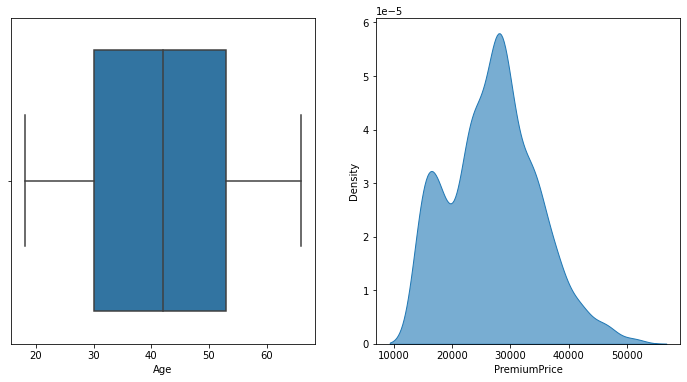

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(df.Age, ax = ax1)
sns.kdeplot(df.PremiumPrice, fill=True, alpha=0.6, ax = ax2)

Does Increase in Age causes more No. of surgeries ?

In [10]:
bins = [17,30,50,100]
labels = [0,1,2]
df['Age_cat'] = pd.cut(df["Age"],bins=bins,labels=labels)
df.groupby('Age_cat')['NumberOfMajorSurgeries'].mean()

Age_cat
0    0.386973
1    0.510490
2    1.141892
Name: NumberOfMajorSurgeries, dtype: float64

Which age group mostly buys the policy ?

In [11]:
df.Age_cat.value_counts()

1    429
2    296
0    261
Name: Age_cat, dtype: int64

Which age group pays the highest ?

In [12]:
df.groupby('Age_cat')['PremiumPrice'].mean()

Age_cat
0    18904.000000
1    28769.659674
2    31826.513514
Name: PremiumPrice, dtype: float64

Does Diabeties and BloodPressureProblems e effect the preimum for costumer ?

<AxesSubplot:xlabel='PremiumPrice', ylabel='Density'>

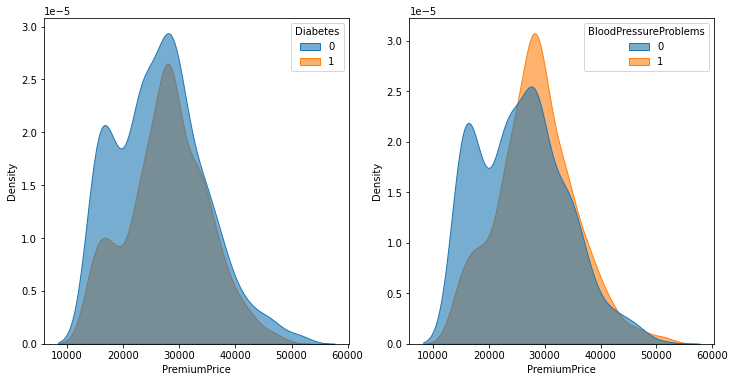

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.kdeplot(data=df, x='PremiumPrice', hue='Diabetes', fill=True, alpha=0.6, ax=ax1)
sns.kdeplot(data=df, x='PremiumPrice', hue='BloodPressureProblems', fill=True, alpha=0.6, ax=ax2)

Allergies and Premium for the Customer

<AxesSubplot:xlabel='KnownAllergies', ylabel='PremiumPrice'>

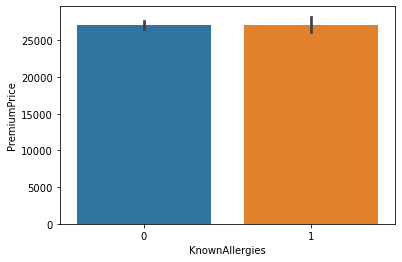

In [14]:
sns.barplot(data=df, x="KnownAllergies",y="PremiumPrice")

# Feature Selection

Creating BMI and it's effect on premium

In [15]:
df["BMI"] = df['Weight']/(df['Height']/100)**2

In [16]:
bins = [10,18,25,30,50]
labels = [0,1,2,3]
df['BMI_class'] = pd.cut(df["BMI"],bins=bins,labels=labels)

In [17]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Smoker,Drinking,Age_cat,BMI,BMI_class
0,45,0,0,0,0,155,57,0,0,0,28000.0,1,0,1,23.725286,1
1,60,1,0,0,0,180,73,0,0,0,34800.0,0,1,2,22.530864,1
2,36,1,1,0,0,158,59,0,0,1,30912.0,1,1,1,23.634033,1
3,52,1,1,0,1,183,93,0,0,2,28000.0,0,0,2,27.770313,2
4,38,0,0,0,1,166,88,0,0,1,27600.0,0,1,1,31.934969,3


In [18]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
Smoker                     0
Drinking                   0
Age_cat                    0
BMI                        0
BMI_class                  0
dtype: int64

<AxesSubplot:>

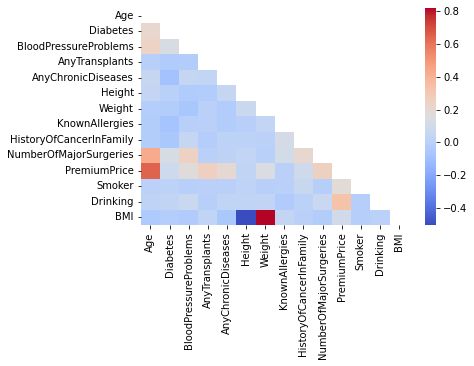

In [19]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, cmap="coolwarm")

In [20]:
df = df.drop(["Age","AnyTransplants","Height","Weight","KnownAllergies","BMI"], axis=1)
df.head()

,Diabetes,BloodPressureProblems,AnyChronicDiseases,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Smoker,Drinking,Age_cat,BMI_class
0,0,0,0,0,0,28000.0,1,0,1,1
1,1,0,0,0,0,34800.0,0,1,2,1
2,1,1,0,0,1,30912.0,1,1,1,1
3,1,1,1,0,2,28000.0,0,0,2,2
4,0,0,1,0,1,27600.0,0,1,1,3


# Building Model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from sklearn.metrics import r2_score

In [22]:
X = df.drop("PremiumPrice", axis=1)
y = df["PremiumPrice"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3 )

In [24]:
scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train))
X_test_s = pd.DataFrame(scaler.transform(X_test))

In [25]:
y_train_s = pd.DataFrame(scaler.fit_transform(y_train.values.reshape(-1, 1)))
y_test_s = pd.DataFrame(scaler.transform(y_test.values.reshape(-1, 1)))

In [26]:
lr_m = LinearRegression()

In [27]:
lr_m.fit(X_train_s,y_train)

LinearRegression()

In [28]:
lr_m_pred = lr_m.predict(X_test_s)

In [29]:
np.sqrt(mean_squared_error(y_test,lr_m_pred))

4755.340831930795

<AxesSubplot:xlabel='PremiumPrice', ylabel='Density'>

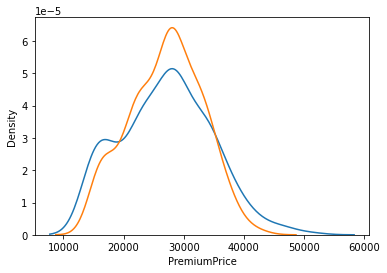

In [30]:
sns.kdeplot(y_test)
sns.kdeplot(lr_m_pred)

In [31]:
print("training: " + str(lr_m.score(X_train_s,y_train)))
print("testing: " + str(lr_m.score(X_test_s,y_test)))

training: 0.6020626719573537
testing: 0.6012569430347074


In [32]:
rf_m = RandomForestRegressor()
rf_m.fit(X_train_s,y_train)
rf_m_pred = rf_m.predict(X_test_s)
np.sqrt(mean_squared_error(y_test,rf_m_pred))

5025.838908482243

<AxesSubplot:xlabel='PremiumPrice', ylabel='Density'>

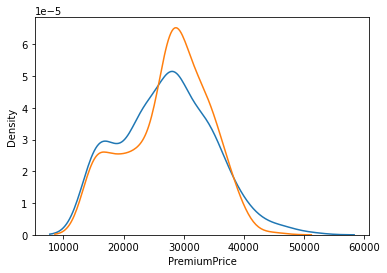

In [33]:
sns.kdeplot(y_test)
sns.kdeplot(rf_m_pred)

In [34]:
print("training: " + str(rf_m.score(X_train_s,y_train)))
print("testing: " + str(rf_m.score(X_test_s,y_test)))

training: 0.8528092605613463
testing: 0.5546033329450417


In [35]:
knn_m = KNeighborsRegressor()
knn_m.fit(X_train_s,y_train)
knn_m_pred = knn_m.predict(X_test_s)
np.sqrt(mean_squared_error(y_test,knn_m_pred))

5152.8521051255975

<AxesSubplot:xlabel='PremiumPrice', ylabel='Density'>

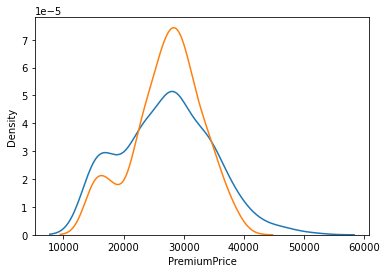

In [36]:
sns.kdeplot(y_test)
sns.kdeplot(knn_m_pred)

In [37]:
print("training: " + str(knn_m.score(X_train_s,y_train)))
print("testing: " + str(knn_m.score(X_test_s,y_test)))

training: 0.6770348658174472
testing: 0.5318067049698554


# HyperTuning Models

training: 0.6020626719573537
testing: 0.6012569430347074


<AxesSubplot:xlabel='PremiumPrice', ylabel='Density'>

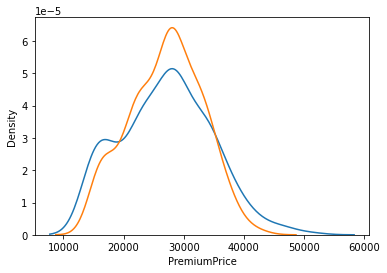

In [38]:

lr_h = LinearRegression(fit_intercept=True)
lr_h.fit(X_train_s, y_train)

lr_h_pred = lr_h.predict(X_test_s)
np.sqrt(mean_squared_error(y_test,lr_h_pred))
print("training: " + str(lr_h.score(X_train_s,y_train)))
print("testing: " + str(lr_h.score(X_test_s,y_test)))
sns.kdeplot(y_test)
sns.kdeplot(lr_h_pred)


In [39]:
lr_h_score = lr_h.score(X_test_s,y_test)

In [40]:
rf_h = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

gs_rf = GridSearchCV(rf_h, param_grid=param_grid, cv=5, n_jobs=-1)

In [41]:
y_train.shape

(690,)

In [42]:
gs_rf.fit(X_train,y_train.to_numpy().ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [43]:
gs_rf_pred = gs_rf.predict(X_test)
np.sqrt(mean_squared_error(y_test,gs_rf_pred))

4578.119294934841

In [44]:
gs_rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 100}

In [45]:
print("training: " + str(gs_rf.score(X_train,y_train)))
print("testing: " + str(gs_rf.score(X_test,y_test)))

training: 0.7441125720945345
testing: 0.6304237582174088


In [46]:
gs_rf_score = r2_score(y_test, gs_rf_pred)

<AxesSubplot:xlabel='PremiumPrice', ylabel='Density'>

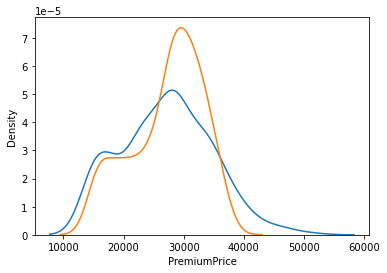

In [47]:
sns.kdeplot(y_test)
sns.kdeplot(gs_rf_pred.reshape(296))

In [48]:
knn_h_err = []
for i in range(1,20):
    knn_h = KNeighborsRegressor(n_neighbors=i)
    knn_h.fit(X_train_s,y_train)
    knn_h_pred = knn_h.predict(X_test_s)
    knn_h_err.append(np.sqrt(mean_squared_error(y_test,knn_h_pred)))


C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

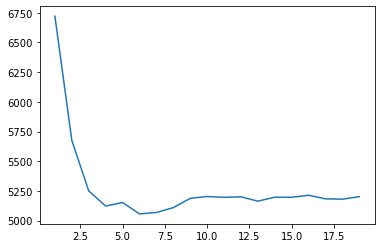

In [49]:
sns.lineplot(range(1,20), knn_h_err)

training: 0.6612413961335548
testing: 0.5491570146505909


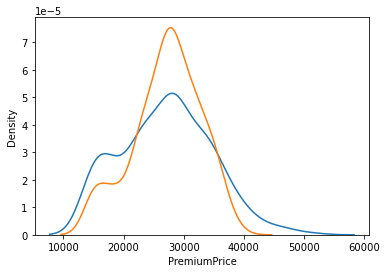

In [50]:
knn_ht = KNeighborsRegressor(n_neighbors=6)
knn_ht.fit(X_train_s,y_train)
knn_ht_pred = knn_ht.predict(X_test_s)
np.sqrt(mean_squared_error(y_test,knn_ht_pred))

print("training: " + str(knn_ht.score(X_train_s,y_train)))
print("testing: " + str(knn_ht.score(X_test_s,y_test)))

sns.kdeplot(y_test)
sns.kdeplot(knn_ht_pred)

knn_ht_score = knn_ht.score(X_test_s,y_test)

In [51]:
ann_m = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_s.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])


ann_m.compile(optimizer='adam', loss='mse', metrics=['mae'])


ann_m.fit(X_train_s, y_train_s, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 0.7952 - mae: 0.6989 - val_loss: 0.4640 - val_mae: 0.5037
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5323 - mae: 0.5231 - val_loss: 0.3847 - val_mae: 0.4560
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4419 - mae: 0.4801 - val_loss: 0.3507 - val_mae: 0.4359
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4009 - mae: 0.4326 - val_loss: 0.3196 - val_mae: 0.4099
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3840 - mae: 0.4360 - val_loss: 0.3166 - val_mae: 0.4078
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3623 - mae: 0.4145 - val_loss: 0.3093 - val_mae: 0.4016
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3557 - mae: 0.4086 - val_loss: 0.3067 - val_mae: 0.4004
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3428 - 

18/18 [==============================] - 0s 4ms/step - loss: 0.1901 - mae: 0.2768 - val_loss: 0.3451 - val_mae: 0.4039
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1908 - mae: 0.2791 - val_loss: 0.3555 - val_mae: 0.3997
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1877 - mae: 0.2805 - val_loss: 0.3632 - val_mae: 0.4050
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1875 - mae: 0.2823 - val_loss: 0.3538 - val_mae: 0.4048
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1843 - mae: 0.2756 - val_loss: 0.3594 - val_mae: 0.4037
Epoch 68/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1915 - mae: 0.2926 - val_loss: 0.3656 - val_mae: 0.4057
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1867 - mae: 0.2818 - val_loss: 0.3596 - val_mae: 0.3990
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1808 - mae: 0

In [52]:
ann_m_pred = ann_m.predict(X_test_s)
ann_m_pred_u = scaler.inverse_transform(ann_m_pred)
np.sqrt(mean_squared_error(y_test_s,ann_m_pred))

10/10 [==============================] - 0s 1ms/step


0.6790124412516447

In [53]:
np.sqrt(mean_squared_error(y_test,ann_m_pred_u))

5132.100845594098

In [54]:
ann_m_pred_u.shape

(296, 1)

<AxesSubplot:xlabel='PremiumPrice', ylabel='Density'>

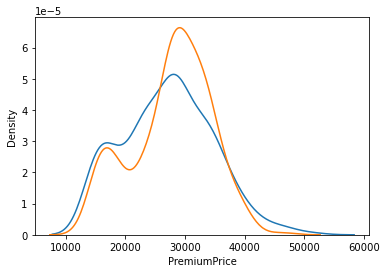

In [55]:
sns.kdeplot(y_test)
sns.kdeplot(ann_m_pred_u.reshape(296))

In [56]:
ann_score = r2_score(y_test_s, ann_m_pred)

# Final Model

C:\Users\rajsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

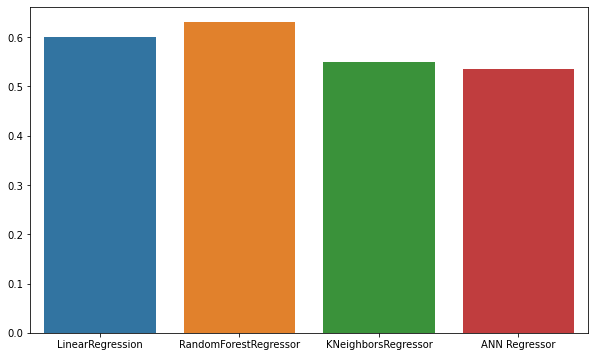

In [57]:
model_name = ["LinearRegression", "RandomForestRegressor","KNeighborsRegressor","ANN Regressor"]
model_score = [lr_h_score, gs_rf_score, knn_ht_score, ann_score]

plt.figure(figsize=(10,6))
sns.barplot(model_name,model_score)

The model with most score is tuned Randomforest regressor
to use it Type gs_rf.predict("enter values")

Diabetes : 1=Yes, 0=No ;

BloodPressureProblems : 1=Yes, 0=No ;

AnyChronicDiseases : 1=Yes, 0=No ; 

HistoryOfCancerInFamily : 1=Yes, 0=No ;

NumberOfMajorSurgeries : number mentioned ;

Smoker : 1=Yes, 0=No ;

Drinking : 1=Yes, 0=No ;

Age_cat : 0 = 17-30 , 1 = 31-50 , 2 = 50-100 ;

BMI_class : 0 = 10-18 , 1 = 19-25 , 2 = 26-30 , 3 = 31-50 ;

# Model deployment

In [58]:
import pickle

In [59]:
pickle.dump(gs_rf, open("ml_model.pkl","wb"))

In [60]:
X_train.head()

,Diabetes,BloodPressureProblems,AnyChronicDiseases,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Smoker,Drinking,Age_cat,BMI_class
578,0,1,0,0,0,0,1,0,3
107,0,0,0,0,1,1,0,1,2
63,0,0,1,0,0,0,1,1,2
391,0,1,0,0,0,0,0,1,2
355,1,0,0,0,2,0,0,2,2
